In [2]:
import folium
from folium import plugins
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import os


In [3]:
df=pd.read_excel(r"C:\Users\sinan.sumaktas\Desktop\Veriler\istanbulsonbiryldepremverisi.xlsx","Son depremler")


In [4]:
print(df[' EventLocationName'].shape)

(349,)


In [5]:
print(df.groupby(' EventLocationName').size())

 EventLocationName
AEGEAN SEA                           26
BLACK SEA                             3
BULGARIA                              2
BULGARIA-GREECE-TURKEY BORDER RG      1
NEAR THE COAST OF WESTERN TURKEY     33
WESTERN TURKEY                      284
dtype: int64


In [6]:
cleanup_nums={
    
     ' EventLocationName':{'WESTERN TURKEY':1,'NEAR THE COAST OF WESTERN TURKEY':2,'AEGEAN SEA':0,'BULGARIA-GREECE-TURKEY BORDER RG':-1,'BULGARIA':-2,'BLACK SEA':-3}
     
              }


In [7]:
df=df.replace(cleanup_nums)

In [10]:
DeleteIndex= df[df[' EventLocationName']==-2].index
df.drop(index=DeleteIndex,inplace=True)

DeleteIndex= df[df[' EventLocationName']==-1].index
df.drop(index=DeleteIndex,inplace=True)

DeleteIndex= df[df[' EventLocationName']==-3].index
df.drop(index=DeleteIndex,inplace=True)

In [8]:
df.head()

,#EventID,Time,Latitude,Longitude,Depth/km,MagType,Magnitude,EventLocationName
0,20200204_0000090,2020-02-04T10:17:09.4Z,38.98,27.86,6,ml,3.4,1
1,20200204_0000082,2020-02-04T08:43:16.0Z,38.98,27.87,10,ml,4.1,1
2,20200204_0000067,2020-02-04T06:13:29.2Z,38.42,25.51,15,ml,3.3,0
3,20200204_0000046,2020-02-04T03:42:21.5Z,38.40,25.53,17,ml,3.3,0
4,20200204_0000034,2020-02-04T03:14:45.4Z,39.08,27.83,9,ml,3.3,1


In [12]:
df1=df.copy()
df1

,#EventID,Time,Latitude,Longitude,Depth/km,MagType,Magnitude,EventLocationName
0,20200204_0000090,2020-02-04T10:17:09.4Z,38.98,27.86,6,ml,3.4,1
1,20200204_0000082,2020-02-04T08:43:16.0Z,38.98,27.87,10,ml,4.1,1
2,20200204_0000067,2020-02-04T06:13:29.2Z,38.42,25.51,15,ml,3.3,0
3,20200204_0000046,2020-02-04T03:42:21.5Z,38.40,25.53,17,ml,3.3,0
4,20200204_0000034,2020-02-04T03:14:45.4Z,39.08,27.83,9,ml,3.3,1
...,...,...,...,...,...,...,...,...
344,20190429_0000132,2019-04-29T18:39:50.8Z,39.42,26.36,7,ml,3.8,2
345,20190429_0000124,2019-04-29T18:02:43.3Z,39.38,26.29,10,ml,4.4,2
346,20190428_0000079,2019-04-28T14:49:25.1Z,38.69,26.90,5,ml,3.4,2
347,20190412_0000074,2019-04-12T13:03:47.8Z,40.69,30.61,7,ml,4.0,1


In [11]:
melted = pd.melt(frame=df,id_vars = ' EventLocationName', value_vars= [' Depth/km ',' Depth/km '])
print(melted)

      EventLocationName    variable  value
0                     1   Depth/km       6
1                     1   Depth/km      10
2                     0   Depth/km      15
3                     0   Depth/km      17
4                     1   Depth/km       9
..                  ...         ...    ...
338                   2   Depth/km       7
339                   2   Depth/km      10
340                   2   Depth/km       5
341                   1   Depth/km       7
342                   1   Depth/km       5

[343 rows x 3 columns]


In [15]:
df.columns[df.isnull().any()]
print(df)

            #EventID                    Time    Latitude    Longitude   \
0    20200204_0000090  2020-02-04T10:17:09.4Z       38.98        27.86   
1    20200204_0000082  2020-02-04T08:43:16.0Z       38.98        27.87   
2    20200204_0000067  2020-02-04T06:13:29.2Z       38.42        25.51   
3    20200204_0000046  2020-02-04T03:42:21.5Z       38.40        25.53   
4    20200204_0000034  2020-02-04T03:14:45.4Z       39.08        27.83   
..                ...                     ...         ...          ...   
344  20190429_0000132  2019-04-29T18:39:50.8Z       39.42        26.36   
345  20190429_0000124  2019-04-29T18:02:43.3Z       39.38        26.29   
346  20190428_0000079  2019-04-28T14:49:25.1Z       38.69        26.90   
347  20190412_0000074  2019-04-12T13:03:47.8Z       40.69        30.61   
348  20190402_0000092  2019-04-02T16:07:43.6Z       38.59        31.14   

      Depth/km   MagType    Magnitude    EventLocationName  
0             6        ml          3.4            

In [16]:
df.isnull().sum()
print(df.isnull().sum())

#EventID              0
 Time                 0
 Latitude             0
 Longitude            0
 Depth/km             0
 MagType              0
 Magnitude            0
 EventLocationName    0
dtype: int64


In [17]:
print(df[' EventLocationName'].notnull().all())

True


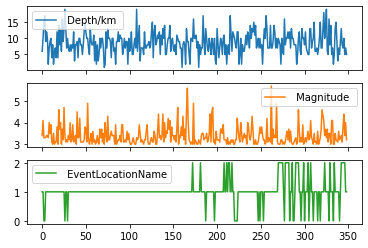

In [18]:
df.drop([' Latitude ', ' Longitude '], axis=1).plot(subplots = True)
plt.show()

In [22]:
print(df[' EventLocationName'].fillna('empty',inplace = True))


None


In [23]:
print(df.describe())

        Latitude    Longitude    Depth/km    Magnitude    EventLocationName
count  343.000000   343.000000  343.000000   343.000000          343.000000
mean    39.413586    27.682420    8.638484     3.404082            1.020408
std      0.765549     0.916386    3.509041     0.446279            0.414846
min     38.000000    25.510000    1.000000     3.000000            0.000000
25%     39.010000    27.650000    7.000000     3.100000            1.000000
50%     39.070000    27.840000    8.000000     3.200000            1.000000
75%     39.490000    27.890000   10.000000     3.600000            1.000000
max     41.430000    31.510000   19.000000     5.700000            2.000000


In [24]:
print(df.loc[4,[" Depth/km "]])

 Depth/km     9
Name: 4, dtype: object


In [25]:
print(df[[" Depth/km "," Magnitude "]])

      Depth/km    Magnitude 
0             6          3.4
1            10          4.1
2            15          3.3
3            17          3.3
4             9          3.3
..          ...          ...
344           7          3.8
345          10          4.4
346           5          3.4
347           7          4.0
348           5          3.2

[343 rows x 2 columns]


In [26]:
print(df.loc[1:20," Depth/km ":" Magnitude "])


     Depth/km   MagType    Magnitude 
1           10        ml          4.1
2           15        ml          3.3
3           17        ml          3.3
4            9        ml          3.3
5           12        ml          3.4
6           10        ml          3.4
7            2        ml          3.3
8            7        ml          4.0
9            9        ml          3.5
10          10        ml          3.9
11           4        ml          3.1
12           8        ml          3.0
13           2        ml          3.5
14           6        ml          3.0
15           7        ml          3.1
16           4        ml          3.1
17          12        ml          3.8
18           4        ml          3.0
19          14        mb          4.6
20           8        ml          3.7


In [27]:
boolean = df[' Depth/km ']> 12
df[boolean]
print(df[boolean])

            #EventID                    Time    Latitude    Longitude   \
2    20200204_0000067  2020-02-04T06:13:29.2Z       38.42        25.51   
3    20200204_0000046  2020-02-04T03:42:21.5Z       38.40        25.53   
19   20200202_0000123  2020-02-02T11:36:40.6Z       39.08        27.87   
21   20200202_0000041  2020-02-02T03:25:43.1Z       39.08        27.82   
23   20200202_0000014  2020-02-02T00:57:43.9Z       40.86        28.19   
25   20200202_0000003  2020-02-02T00:23:47.8Z       39.00        27.85   
26   20200201_0000172  2020-02-01T17:34:04.7Z       38.96        25.52   
27   20200201_0000106  2020-02-01T12:46:05.0Z       39.08        27.83   
49   20200128_0000094  2020-01-28T12:00:29.5Z       39.06        27.85   
55   20200128_0000062  2020-01-28T08:36:33.6Z       39.01        27.79   
75   20200125_0000165  2020-01-25T17:49:47.8Z       39.04        27.83   
108  20200123_0000128  2020-01-23T10:38:01.1Z       39.11        27.83   
111  20200123_0000111  2020-01-23T08:3

In [28]:
x=df[' Depth/km ']> 12
y=df[' Magnitude ']> 3.5
df[x&y]

,#EventID,Time,Latitude,Longitude,Depth/km,MagType,Magnitude,EventLocationName
19,20200202_0000123,2020-02-02T11:36:40.6Z,39.08,27.87,14,mb,4.6,1
21,20200202_0000041,2020-02-02T03:25:43.1Z,39.08,27.82,13,ml,4.0,1
23,20200202_0000014,2020-02-02T00:57:43.9Z,40.86,28.19,16,ml,3.7,1
25,20200202_0000003,2020-02-02T00:23:47.8Z,39.00,27.85,13,ml,4.7,1
49,20200128_0000094,2020-01-28T12:00:29.5Z,39.06,27.85,15,ml,3.8,1
75,20200125_0000165,2020-01-25T17:49:47.8Z,39.04,27.83,13,ml,4.3,1
111,20200123_0000111,2020-01-23T08:34:45.4Z,39.01,27.83,14,ml,3.9,1
138,20200122_0000191,2020-01-22T22:39:18.5Z,39.03,27.86,13,ml,4.4,1
140,20200122_0000177,2020-01-22T21:52:05.6Z,39.07,27.86,14,ml,4.0,1
146,20200122_0000165,2020-01-22T21:24:07.4Z,39.05,27.85,14,ml,4.1,1


In [29]:
print(df[x&y])

            #EventID                    Time    Latitude    Longitude   \
19   20200202_0000123  2020-02-02T11:36:40.6Z       39.08        27.87   
21   20200202_0000041  2020-02-02T03:25:43.1Z       39.08        27.82   
23   20200202_0000014  2020-02-02T00:57:43.9Z       40.86        28.19   
25   20200202_0000003  2020-02-02T00:23:47.8Z       39.00        27.85   
49   20200128_0000094  2020-01-28T12:00:29.5Z       39.06        27.85   
75   20200125_0000165  2020-01-25T17:49:47.8Z       39.04        27.83   
111  20200123_0000111  2020-01-23T08:34:45.4Z       39.01        27.83   
138  20200122_0000191  2020-01-22T22:39:18.5Z       39.03        27.86   
140  20200122_0000177  2020-01-22T21:52:05.6Z       39.07        27.86   
146  20200122_0000165  2020-01-22T21:24:07.4Z       39.05        27.85   
165  20200122_0000125  2020-01-22T19:25:13.8Z       39.06        27.85   
173  20200111_0000067  2020-01-11T13:37:37.0Z       40.85        28.24   
240  20190926_0000178  2019-09-26T20:1

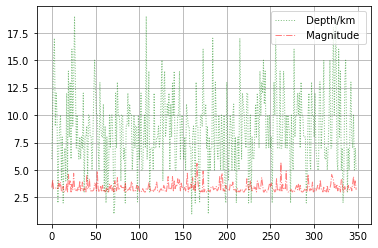

In [30]:
df[' Depth/km '].plot(kind = 'line', color = 'g',label = ' Depth/km ',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
df[' Magnitude '].plot(color = 'r',label = ' Magnitude ',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')
plt.show()   


In [31]:
 def div(n):
     return n/2
print(df[' Depth/km '].apply(div))

0      3.0
1      5.0
2      7.5
3      8.5
4      4.5
      ... 
344    3.5
345    5.0
346    2.5
347    3.5
348    2.5
Name:  Depth/km , Length: 343, dtype: float64


C:\Users\sinan.sumaktas\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sinan.sumaktas\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


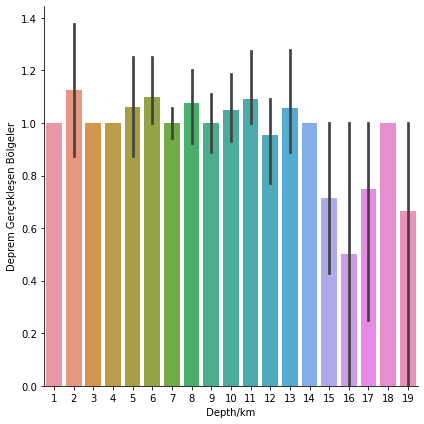

In [32]:
g = sns.factorplot(x = " Depth/km ", y = " EventLocationName", data = df, kind = "bar", size = 6)
g.set_ylabels("Deprem Gerçekleşen Bölgeler")
plt.show()


In [33]:
print(df[' Magnitude '].shape)
print(df.groupby(' Magnitude ').size())

(343,)
 Magnitude 
3.0    56
3.1    66
3.2    50
3.3    33
3.4    30
3.5    20
3.6    14
3.7    17
3.8     8
3.9     9
4.0     9
4.1     6
4.2     4
4.3     3
4.4     4
4.5     3
4.6     3
4.7     3
4.9     3
5.6     1
5.7     1
dtype: int64


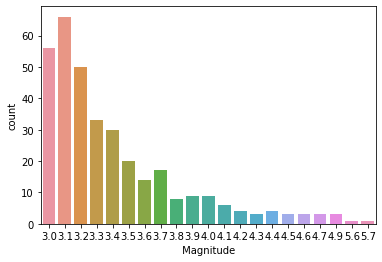

In [34]:
sns.countplot(df[' Magnitude '],label="Sayısı")
plt.show()

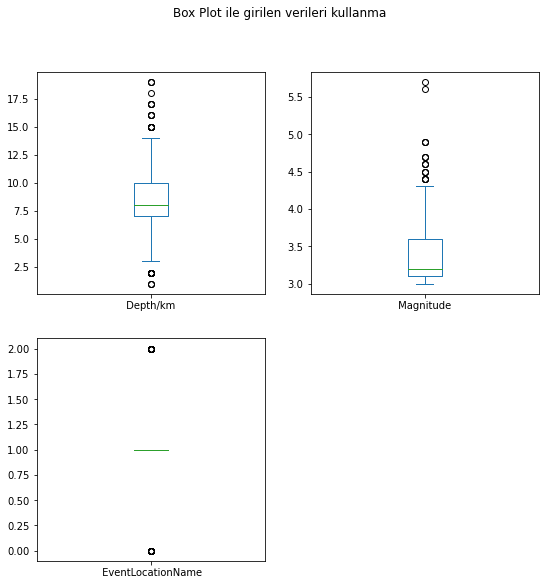

In [35]:
df.drop([' Latitude ', ' Longitude '], axis=1).plot(kind='box',subplots=True, layout=(2,2),
                                  sharex=False, sharey=False,figsize=(9,9),
                                  title='Box Plot ile girilen verileri kullanma')
plt.savefig('df_box')
plt.show()

In [36]:
print(df.corr())

                     Latitude    Longitude    Depth/km    Magnitude   \
 Latitude             1.000000     0.368801    0.189843     0.080526   
 Longitude            0.368801     1.000000   -0.152935     0.096819   
 Depth/km             0.189843    -0.152935    1.000000     0.203344   
 Magnitude            0.080526     0.096819    0.203344     1.000000   
 EventLocationName   -0.199745     0.097013   -0.133512     0.015342   

                     EventLocationName  
 Latitude                    -0.199745  
 Longitude                    0.097013  
 Depth/km                    -0.133512  
 Magnitude                    0.015342  
 EventLocationName            1.000000  


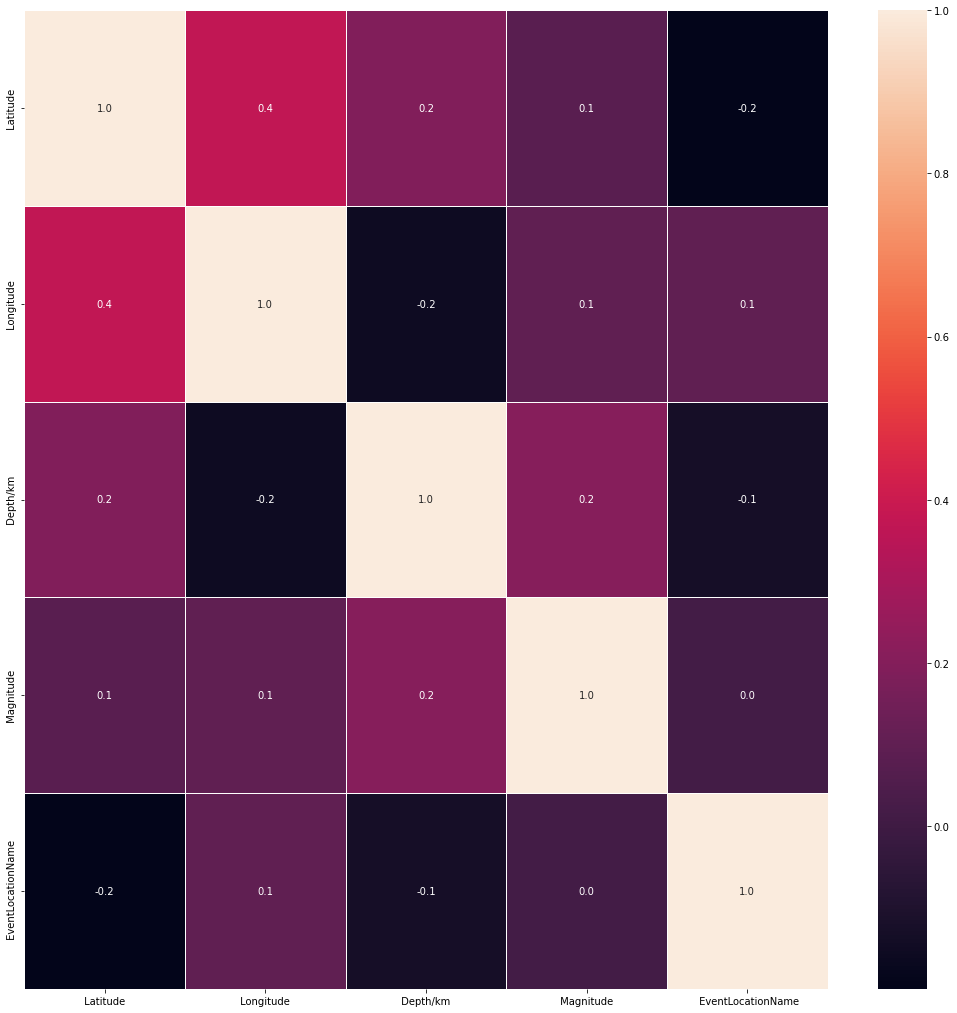

In [37]:
f, ax =plt.subplots(figsize=(18,18))
df.drop(['#EventID ',' Latitude ', ' Longitude '], axis=1),sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

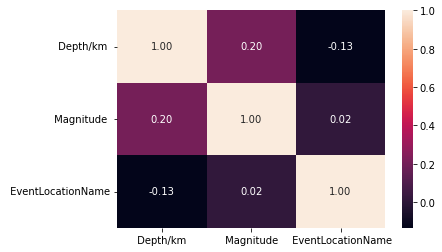

In [38]:
list1 = [" Depth/km ", " Magnitude ",' EventLocationName']
sns.heatmap(df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

In [42]:
a=folium.Map(location=[40,31],zoom_start=6)
heat_df=df[[" Latitude "," Longitude "]]
heat_data=list(zip(df[' Latitude '], df[' Longitude ']))
folium.plugins.HeatMap(heat_data).add_to(a)
a
    

In [43]:
m= folium.Map([36,33], zoom_start=8,width='%100',height='%100')
location=df[[" Latitude "," Longitude "]]
plugins.MarkerCluster(location).add_to(m)
m

In [45]:
m= folium.Map(location=[41,30],zoom_start=8)
for i in range(0,len(df)):
    folium.Marker([df.iloc[i][" Latitude "], df.iloc[i][" Longitude "]]).add_to(m)
    folium.CircleMarker(location=[df.iloc[i][" Latitude "],df.iloc[i][" Longitude "]],radius=30, fill_color='red',fill=True).add_to(m)
m    